# Project: Investigate a Dataset | No Show
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

### Data Dictionary
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
- DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: 1 or more messages sent to the patient.
- No-show: True or False.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('No Show.csv')

In [3]:
# Show the first few rows in the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Inspect data type and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Statistical assessing for integer columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Handcap column should only be 0 and 1 but we got a max of 4
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [7]:
# We also saw a minimum age of -1, so let's check age less than zero
df[df.Age >= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
# Let's see if the data frame has any duplicated values
sum(df.duplicated())

0

## Quality Issues

- Mis-pronounced columns names (Handcap, Hipertension).
- Column SMS and No show have dashes.
- Lower case ID in PatientId.
- Change column NoShow to become "Attendance" and swap values of yes and no for an easier read
- Wrongful data types:
  - PatientId and AppointmentID should be string object.
  - ScheduledDay and AppointmentDay should be datetime.
- NoShow is categorical instead of numerical 0 and 1
- Erroneous data:
 - Age has data less than or equal 0
 - Handicap has data other than 0 and 1

###  Cleaning

In [9]:
# Make a copy of this dataframe for backup
df_copy = df.copy()

In [10]:
# Get list of column names
df_copy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
# Load the new desired column names instead of the old ones
df_copy.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'Attendance']

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMSReceived     110527 non-null  int64  
 13  Attendance      110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# Swap Yes for No and No for Yes. So it becomes 'Yes' if patient attended and 'No' if not
df_copy.Attendance = df_copy.Attendance.map({'Yes': 0, 'No': 1})

In [13]:
# Change PatientID data type to string
df_copy['PatientID'] = df_copy['PatientID'].astype('object')

In [14]:
# Change AppointmentID data type to string
df_copy.AppointmentID = df_copy.AppointmentID.astype('object')

In [15]:
# Let's change ScheduledDay to datetime format
df_copy.ScheduledDay

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110527, dtype: object

In [16]:
# First, we need to remove the letters and insert a space between date and time
df_copy['ScheduledDay'] = df_copy['ScheduledDay'].map(lambda x: x.rstrip('Z').replace('T',' '))
df_copy.ScheduledDay

0         2016-04-29 18:38:08
1         2016-04-29 16:08:27
2         2016-04-29 16:19:04
3         2016-04-29 17:29:31
4         2016-04-29 16:07:23
                 ...         
110522    2016-05-03 09:15:35
110523    2016-05-03 07:27:33
110524    2016-04-27 16:03:52
110525    2016-04-27 15:09:23
110526    2016-04-27 13:30:56
Name: ScheduledDay, Length: 110527, dtype: object

In [17]:
# Change format into datetime
df_copy['ScheduledDay'] = pd.to_datetime(df_copy['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')

In [18]:
# Check the new format
df_copy.ScheduledDay

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [19]:
# Repeat the above process with AppointmentDay
df_copy['AppointmentDay'] = df_copy['AppointmentDay'].map(lambda x: x.rstrip('Z').replace('T',' '))

In [20]:
df_copy['AppointmentDay'] = pd.to_datetime(df_copy['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')

In [21]:
# Check the new format
df_copy.AppointmentDay

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [22]:
# Set all values of age less than zero to nan values
df_copy.loc[df_copy.Age <= 0, "Age"] = np.nan

In [23]:
# Check if they are all removed
df_copy[df_copy['Age']<=0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attendance


In [24]:
# Now drop all those nan vlaues out of the dataframe
df_copy.dropna(inplace=True)

In [25]:
# Check if there is any nan left
df_copy.Age.isna().sum()

0

In [26]:
# Change back the type of Age to integer
df_copy.Age = df_copy.Age.astype(int)

In [27]:
# Check again for erroneous values of Handicap
df_copy.Handicap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [28]:
# Set all the values larger than one to nan values
df_copy.loc[df_copy.Handicap > 1, "Handicap"] = np.nan

In [29]:
# Now drop those values out of the dataframe
df_copy.dropna(inplace=True)

In [30]:
# Check if there is any nan left
df_copy.Handicap.isna().sum()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106788 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       106788 non-null  object        
 1   AppointmentID   106788 non-null  object        
 2   Gender          106788 non-null  object        
 3   ScheduledDay    106788 non-null  datetime64[ns]
 4   AppointmentDay  106788 non-null  datetime64[ns]
 5   Age             106788 non-null  int32         
 6   Neighbourhood   106788 non-null  object        
 7   Scholarship     106788 non-null  int64         
 8   Hypertension    106788 non-null  int64         
 9   Diabetes        106788 non-null  int64         
 10  Alcoholism      106788 non-null  int64         
 11  Handicap        106788 non-null  float64       
 12  SMSReceived     106788 non-null  int64         
 13  Attendance      106788 non-null  int64         
dtypes: datetime64[ns](2), float64(1), in

In [31]:
# Change back the type of Age to integer
df_copy.Handicap = df_copy.Handicap.astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

- How is the relation between age and attendance?


- Does gender play a role in missing appointments?


- Does having a health insurance encourage or discourage attending check-ups?


- How having a symptom affects one's attending?


- What age groups show up the least?


- Correlation between data points

### How is the relation between age and attendance?

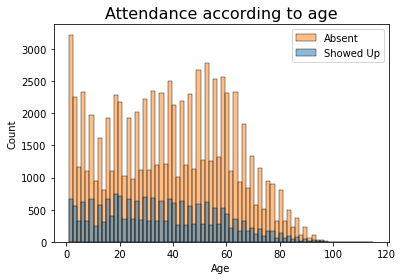

In [32]:
# Plot Relation between Age and Attendance
plot = sns.histplot(x=df_copy.Age, hue=df_copy.Attendance, data=df_copy)
plot.set_title("Attendance according to age", size='16')
plt.legend(labels=['Absent', 'Showed Up']);

Histogram that showcase the distribution of age between showing up and not showing up.

### What age groups show up the least?

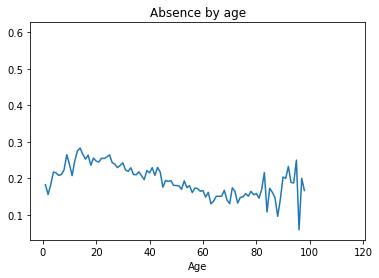

In [33]:
# Plotting ratio of patients not showing up according to age
age_ratio = df_copy[df_copy.Attendance == 0].groupby('Age').size()/df_copy.groupby('Age').size()
age_ratio.plot()
plt.title('Absence by age');

This line chart expresses the absence across different age groups

### Does gender play a role in missing appointments?

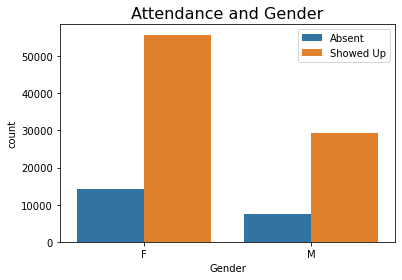

In [34]:
# Visualize attendance across genders
plot = sns.countplot(x=df_copy.Gender, hue=df_copy.Attendance, data=df_copy)
plot.set_title("Attendance and Gender", size='16')
plt.legend(labels=['Absent', 'Showed Up']);

The number of females is much more prevalent over males in this dataset. So, let's compute the ratio of not attending between genders.

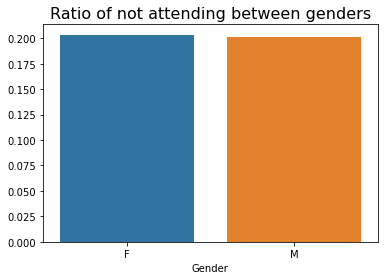

In [35]:
# Visualizing the ratio of not attending between both genders.
ratio = df_copy[df_copy.Attendance == 0].groupby('Gender').size()/df_copy.groupby('Gender').size()
plot = sns.barplot(x=ratio.index, y=ratio)
plot.set_title("Ratio of not attending between genders", size='16');

The difference is negligible between genders when it comes to the frequency of not showing up

## Does having a health insurance encourage or discourage attending check-ups?

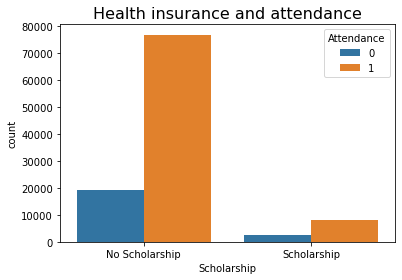

In [36]:
# Visualizing the relationship between having a scholarship and attendance.
plot = sns.countplot(x=df_copy.Scholarship, hue=df_copy.Attendance, data=df_copy)
plot.set_title("Health insurance and attendance", size='16')
x_ticks_labels=['No Scholarship', 'Scholarship']
plot.set_xticklabels(x_ticks_labels);

We can see above that the number of patients not having a scholarship is much larger than those who have one.

''

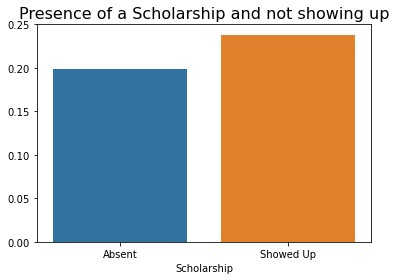

In [37]:
# Visualizing the ratio of not attending between those having a scholarship and those who don't.

ratio = df_copy[df_copy.Attendance == 0].groupby('Scholarship').size()/df_copy.groupby('Scholarship').size()
plot = sns.barplot(x=ratio.index, y=ratio)
plot.set_title("Presence of a Scholarship and not showing up", size='16')
plt.xticks([0,1], ['Absent', 'Showed Up'], rotation=0)
;

We can see above how those having a health insurance are absent more frequently than those who don't

## How having a symptom affects one's attending?

<Figure size 432x288 with 0 Axes>

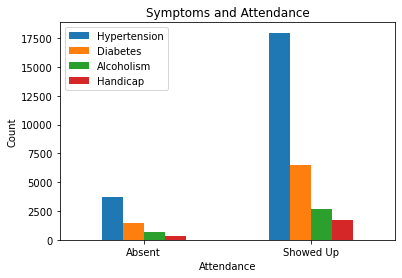

In [38]:
# Exploring relations of symbtoms with attendance

symps = df_copy.groupby('Attendance')[['Hypertension','Diabetes','Alcoholism','Handicap']].sum()
plt.figure()
symps.plot(kind='bar')
plt.title("Symptoms and Attendance")
plt.xticks([0,1], ['Absent', 'Showed Up'], rotation=0)
plt.ylabel('Count');

Above analysis shows that having a symptom doesn't make people more likely to miss their check-up

### Correlation between data points

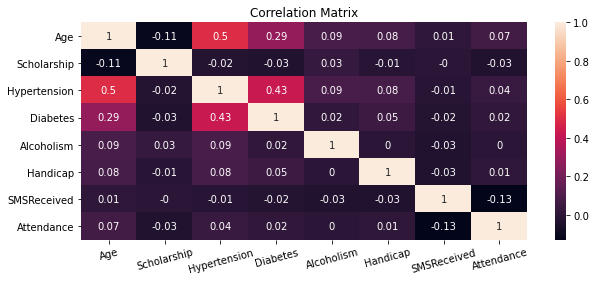

In [39]:
# Plotting a correlation matrix for the whole dataset
plt.figure(figsize=(10,4))
sns.heatmap(df_copy.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=15);

The heatmap shows that all values are slightly negative correralted with attendance, except for SMSReceived and Scholarship. 

<a id='conclusions'></a>
## Conclusions

The dataset is small and it doesn't include many shocking relations. It was also very easy to clean and didn't have many issues. However, more complex analysis may reveal more interesting insights. 

### Results:

- It's apparent from the dataset that the most people who attend the check-up are kids from 1 years old, which means their parents are committed to showing up.


- We concluded that both gender are equally (in terms of ratio) not attending the appointments, so by that we know that gender doesn't affect showing up.


- A rather interesting find, was that the ratio of those having a scholarship and not showing up was noticably larger than the absence of those who don't own one. Which may suggest that having to pay less (or not at all) for a medical check-up discourages people from committing to their appointments.


- People having a symptom are not more likely to miss the appointment. 


- Strangely, there is a high correlation between receiving an SMS and not showing up. But they are definetly not correlated.


### Limitation:

- Most data columns are binary making it limited in terms of statistical analysis.

- Little details that can make our analysis more definitive.

- Skewed patient types, such as in gender and age.


Overall, the data didn't help us identifying what might be causing the absents.